# Trends in land temperature in different states in India #


### Introduction ###
We will be considering the dataset "Climate Change: Earth Surface Temperature Data" which explores the global land temperatures since 1750. The data is retrieved from https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data. The data is compiled in several different files according to how it was collected and compiled. For example, the data is divided by  City, Major City, States, and Countries. The data published on Kaggle was a repackaged version of 1.6 billion temperatures combined by the Berkeley Earth Surface Temperature Study. 

For this particular notebook, I'll be noticing the trends in the average land temperature in different states of India. We will see if the average temperature (Y) in different states (X1) in India from the year 1796 to 2013 (X2). 

### Research Question - The question that I will aim to answer using the this data is whether we notice an increase in land temperatures in different states in India over time. 

In [3]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

In [4]:
# Read data into a dataframe called country_df
country_data_raw = pd.read_csv("C:/Users/Dell/OneDrive - University of Toronto/Desktop/3rd Year/Courses/ECO225/GlobalLandTemperaturesByState.csv")
country_df = pd.DataFrame(country_data_raw)

In [5]:
# Cleaning the dataframe by first selecting only the data with the Country as India
cond_ = country_df["Country"].isin(["India"])

# Assigning the filtered data to a variable called india_data
india_data = country_df[cond_]

# Dropping the Country Name and Average Temperature Uncertainty columns from the data 
# and assigning it to a new variable called y
y = india_data.drop(columns=["AverageTemperatureUncertainty", "Country"])

# Dropping entries with no data and resetting index and assigning to variable 
# called new
y = y.dropna().reset_index()
new = y.copy()
new = new.drop(columns=["index"])

# Converting the date in the column dt to a uniform DateTimeIndex
dates = pd.DatetimeIndex(new['dt'])

In [6]:
new.loc[:, 'dt'] = dates
new

,dt,AverageTemperature,State
0,1796-01-01,26.534,Andaman And Nicobar
1,1796-02-01,26.294,Andaman And Nicobar
2,1796-03-01,26.180,Andaman And Nicobar
3,1796-04-01,27.942,Andaman And Nicobar
4,1796-05-01,28.651,Andaman And Nicobar
...,...,...,...
81615,2013-01-04,28.707,West Bengal
81616,2013-01-05,29.694,West Bengal
81617,2013-01-06,29.628,West Bengal
81618,2013-01-07,29.115,West Bengal


The above Dataframe 'new' shows yearly average temperature for the different states in India

### Summary Statistics ###
The summary statistics of average temperature, average temperature of each state, and average temperature of each year.

In [7]:
# Summary statistics of average temperature
new.describe()

,AverageTemperature
count,81620.000000
mean,22.534576
std,7.749321
min,-11.984000
25%,19.063000
50%,25.094500
75%,27.628000
max,36.339000


The above table represents the Summary Statistics of the Average Temperature from the DataFrame 'new'.

In [16]:
# Average temperature over the years by State
state_temp = new[["State", "AverageTemperature"]].groupby("State").mean()
state_temp

,AverageTemperature
State,
Andaman And Nicobar,27.231677
Andhra Pradesh,27.090003
Arunachal Pradesh,13.795670
Assam,21.875561
Bihar,24.486945
Chandigarh,13.381667
Chhattisgarh,25.589014
Dadra And Nagar Haveli,24.969918
Daman And Diu,26.274003


The above table shows the average temperature from the year 1796 to 2013 for all the states in India

In [9]:
# Average temperature by year
yearly_temp = new.groupby(pd.Grouper(key="dt", freq="A")).mean().dropna()
yearly_temp

,AverageTemperature
dt,
1796-12-31,24.388083
1797-12-31,25.407240
1798-12-31,24.129472
1799-12-31,24.663863
1800-12-31,24.629430
...,...
2009-12-31,23.468466
2010-12-31,23.387196
2011-12-31,22.821696


The above table shows yearly the average temperature.

In [10]:
# Creating a final copy of data where it is sorted by Year and State.
# Gives the average temperature for each state that year
final_data = new.groupby([pd.Grouper(key='dt', freq='A'), 
                          pd.Grouper(key = 'State')]).mean().copy()
final_data

AverageTemperature
dt         State                                     
1796-12-31 Andaman And Nicobar              27.070833
           Andhra Pradesh                   26.750750
           Bihar                            24.334167
           Chhattisgarh                     25.349167
           Dadra And Nagar Haveli           24.750333
...                                               ...
2013-12-31 Tamil Nadu                       28.445375
           Tripura                          25.909250
           Uttar Pradesh                    26.044250
           Uttaranchal                      15.991125
           West Bengal                      26.237375

[6878 rows x 1 columns]

The above DataFrame 'final_data' shows the average temperature for each individual state every year.

### Plotting the relation between Y and the different Xs separately ###

<AxesSubplot:xlabel='dt'>

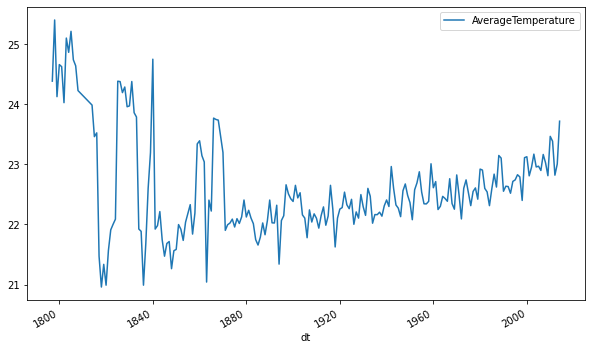

In [11]:
# Creating a line graph of X2 (Years) and Y (average temperature)
yearly_temp.plot(figsize=(10,6))

###### The above graph depicts a line graph with the dt (date) on the x axis and the average temperatures on the Y axis. The graph shows some extreme points up until 1870s. Post that we see a gradual increase in the average temperatures over the years. #####

<AxesSubplot:xlabel='State'>

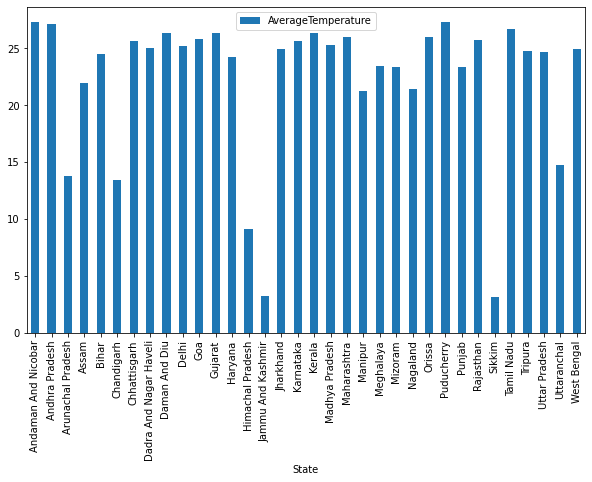

In [12]:
# Creating a bar graph of X1 (States) and Y (average temperature)
state_temp.plot(figsize=(10,6), kind="bar")

##### The graph depicts the temperature of different states in India averaged over the years. We don't notice any trend here, probably because the data here has no time component to it. The temperatures are averaged over all the years. ######

In [13]:
# Here we are transposing the data so that we can get the date on the y-axis
u = final_data.unstack(level=0).T
u

State                          Andaman And Nicobar  Andhra Pradesh  \
                   dt                                                
AverageTemperature 1796-12-31            27.070833       26.750750   
                   1797-12-31            27.163400       27.755800   
                   1798-12-31            27.374600       26.518800   
                   1799-12-31            27.336167       27.062417   
                   1800-12-31            27.281167       27.097417   
...                                            ...             ...   
                   2009-12-31            28.153917       28.223917   
                   2010-12-31            28.489833       27.918667   
                   2011-12-31            27.976500       27.624083   
                   2012-12-31            28.251083       28.180083   
                   2013-12-31            28.505875       28.980625   

State                          Arunachal Pradesh      Assam      Bihar  \
                   dt                                                    
AverageTemperature 1796-12-31                NaN        NaN  24.334167   
                   1797-12-31                NaN        NaN  25.722600   
                   1798-12-31                NaN        NaN  23.846300   
                   1799-12-31                NaN        NaN  24.594917   
                   1800-12-31                NaN        NaN  24.531250   
...                                          ...        ...        ...   
                   2009-12-31          15.147250  23.074500  25.682167   
                   2010-12-31          14.699167  22.704167  25.865000   
                   2011-12-31          14.535417  22.480667  24.871000   
                   2012-12-31          14.274417  22.235000  25.231250   
                   2013-12-31          15.447750  23.367375  25.844875   

State                          Chandigarh  Chhattisgarh  \
                   dt                                     
AverageTemperature 1796-12-31         NaN     25.349167   
                   1797-12-31         NaN     26.481200   
                   1798-12-31         NaN     24.697600   
                   1799-12-31         NaN     25.634667   
                   1800-12-31         NaN     25.619500   
...                                   ...           ...   
                   2009-12-31   14.629833     26.901167   
                   2010-12-31   14.723250     26.759167   
                   2011-12-31   14.101333     25.935667   
                   2012-12-31   14.194417     26.410333   
                   2013-12-31   14.741875     27.355250   

State                          Dadra And Nagar Haveli  Daman And Diu  \
                   dt                                                  
AverageTemperature 1796-12-31               24.750333      26.087083   
                   1797-12-31               25.624700      26.857600   
                   1798-12-31               24.411100      26.127200   
                   1799-12-31               25.029500      26.357167   
                   1800-12-31               25.001583      26.311333   
...                                               ...            ...   
                   2009-12-31               26.339833      27.637417   
                   2010-12-31               26.196917      27.420750   
                   2011-12-31               25.633833      27.061083   
                   2012-12-31               25.566583      26.825417   
                   2013-12-31               26.093375      26.827375   

State                              Delhi  ...     Orissa  Puducherry  \
                   dt                     ...                          
AverageTemperature 1796-12-31  25.030250  ...  25.692833   26.894583   
                   1797-12-31  26.711900  ...  26.664600   27.741600   
                   1798-12-31  24.289700  ...  25.314000   27.132900   
                   1799-12-31  25.284167  ...  25.977667   27

The above DataFrame 'u' is just the the DataFrame 'final_data' but the x and the y labels shifted. So we have a MultiIndex - 'AverageTemperature and Date' as the Index - and the States as the Columns

<AxesSubplot:xlabel='None,dt'>

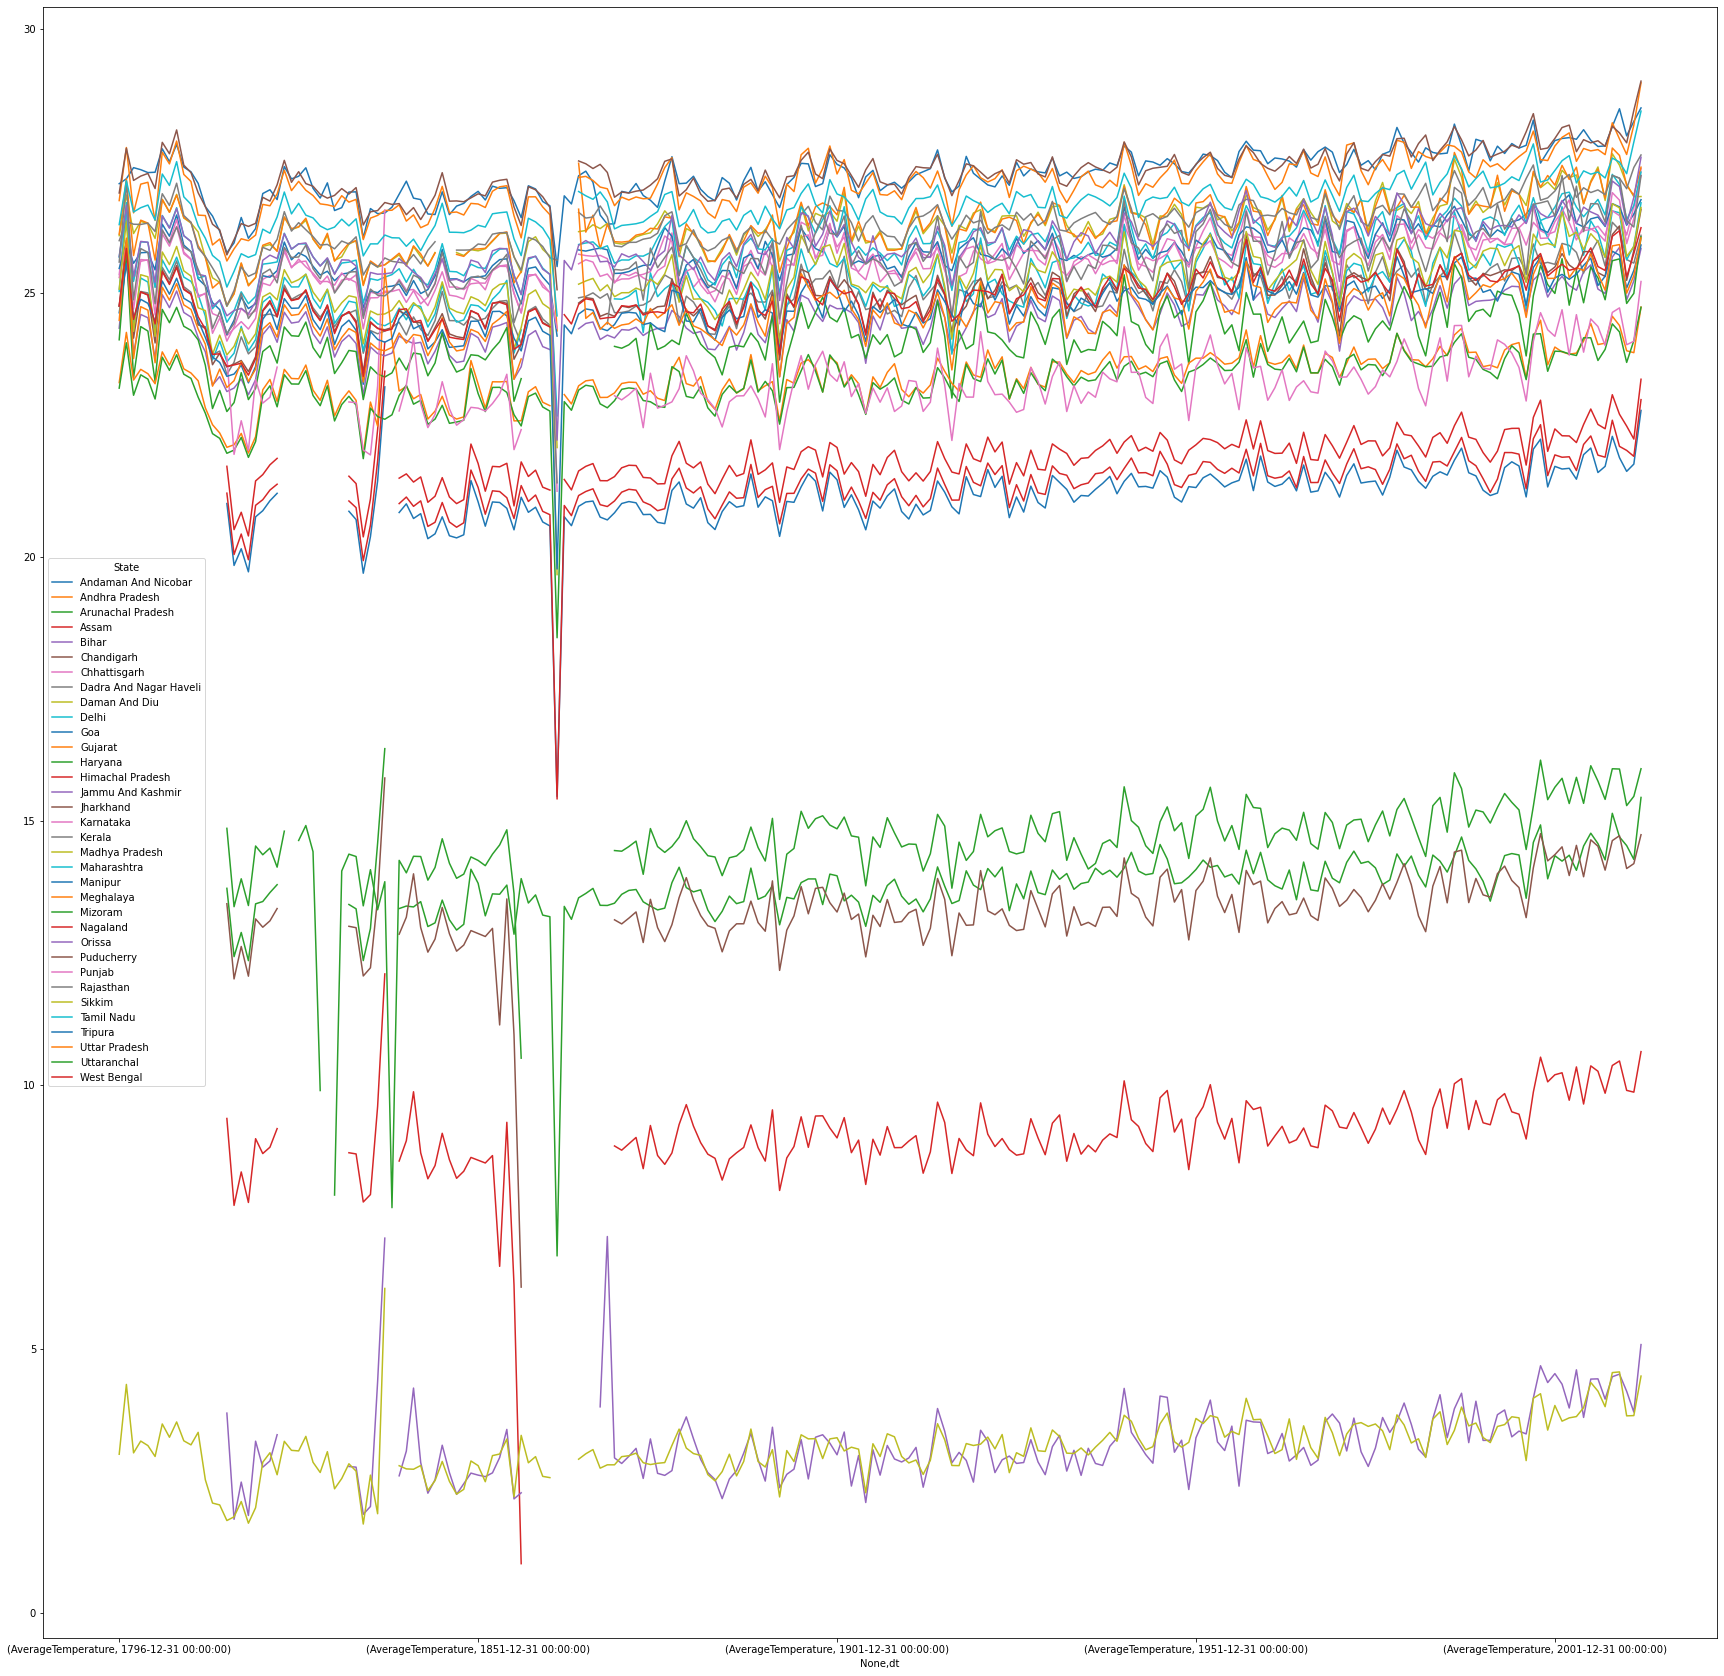

In [14]:
# Plotting the data to get different line charts on the 
# same graph depicting the trends in average temperature
u.plot(figsize=(30,30))

##### We see here that the data is very scattered and noisy with missing values for certain time periods for some states. But overall speaking, we see a consistent but small increase in average temperatures starting the 1950s. 

## Conclusion ##
Using the above data we see some inconsistencies in the average land temperatures till the late 1800s. Post 1900, we see a consistent yet gradual increase in the average land temperatures for all the states. While this increase is not very prominent and large in terms of the absolutele value, the correlation can be seen. This increasing temperature is a cause for alarm because we know that even a 1 degree Celsius increase in global temperature can be devastating for everything on this planet.